# Data Preparation and Cleaning

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.metrics import silhouette_score 

In [12]:
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv('df_traffic_parking_weather_weather.csv')

In [5]:
list(df)

['Unnamed: 0.1',
 'Unnamed: 0',
 'datetime',
 'datetimeEpoch',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 'winddir',
 'pressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'sunrise',
 'sunriseEpoch',
 'sunset',
 'sunsetEpoch',
 'moonphase',
 'conditions',
 'description',
 'icon',
 'stations',
 'source',
 'latitude',
 'longitude',
 'resolvedAddress',
 'address',
 'timezone',
 'tzoffset',
 'severerisk',
 'date',
 'ID_TRAM',
 'UTM_IX',
 'UTM_FX',
 'UTM_IY',
 'UTM_FY',
 'LATITUD_I',
 'LONGITUD_I',
 'LATITUD_F',
 'LONGITUD_F',
 'ID_TARIFA',
 'ID_HORARIO',
 'TIPUS_TRAM',
 'ADREÇA',
 'PLACES',
 'pCOLOR',
 'RGB',
 'COLOR',
 'TYPE',
 'CODI_HORARI',
 'DESCRIPTION_HORARI',
 'DESC_CURTA_HORARI',
 'INCLUS_FESTIUS',
 'PARQUING_SOLS_DINS_HORARI',
 'ID_TIPUS_TARIFA',
 'CODI_TARIFA',
 'TIPUS_FRACCIO',
 

In [6]:
rename_dict = {
    'Unnamed: 0.1': 'unnamed_0_1',
    'Unnamed: 0': 'unnamed_0',
    'datetime': 'datetime',
    'datetimeEpoch': 'datetime_epoch',
    'tempmax': 'temp_max',
    'tempmin': 'temp_min',
    'temp': 'temp',
    'feelslikemax': 'feels_like_max',
    'feelslikemin': 'feels_like_min',
    'feelslike': 'feels_like',
    'dew': 'dew_point',
    'humidity': 'humidity',
    'precip': 'precipitation',
    'precipprob': 'precip_probability',
    'precipcover': 'precip_coverage',
    'preciptype': 'precipitation_type',
    'snow': 'snow',
    'snowdepth': 'snow_depth',
    'windgust': 'wind_gust',
    'windspeed': 'wind_speed',
    'winddir': 'wind_direction',
    'pressure': 'pressure',
    'cloudcover': 'cloud_cover',
    'visibility': 'visibility',
    'solarradiation': 'solar_radiation',
    'solarenergy': 'solar_energy',
    'uvindex': 'uv_index',
    'sunrise': 'sunrise',
    'sunriseEpoch': 'sunrise_epoch',
    'sunset': 'sunset',
    'sunsetEpoch': 'sunset_epoch',
    'moonphase': 'moon_phase',
    'conditions': 'conditions',
    'description': 'description',
    'icon': 'icon',
    'stations': 'stations',
    'source': 'source',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'resolvedAddress': 'resolved_address',
    'address': 'address',
    'timezone': 'timezone',
    'tzoffset': 'timezone_offset',
    'severerisk': 'severe_risk',
    'date': 'date',
    'ID_TRAM': 'id_tram',
    'UTM_IX': 'utm_ix',
    'UTM_FX': 'utm_fx',
    'UTM_IY': 'utm_iy',
    'UTM_FY': 'utm_fy',
    'LATITUD_I': 'latitude_start',
    'LONGITUD_I': 'longitude_start',
    'LATITUD_F': 'latitude_end',
    'LONGITUD_F': 'longitude_end',
    'ID_TARIFA': 'tariff_id',
    'ID_HORARIO': 'schedule_id',
    'TIPUS_TRAM': 'section_type',
    'ADREÇA': 'address',
    'PLACES': 'places',
    'pCOLOR': 'p_color',
    'RGB': 'rgb',
    'COLOR': 'color',
    'TYPE': 'type',
    'CODI_HORARI': 'schedule_code',
    'DESCRIPTION_HORARI': 'schedule_description',
    'DESC_CURTA_HORARI': 'short_schedule_description',
    'INCLUS_FESTIUS': 'include_holidays',
    'PARQUING_SOLS_DINS_HORARI': 'parking_within_schedule',
    'ID_TIPUS_TARIFA': 'tariff_type_id',
    'CODI_TARIFA': 'tariff_code',
    'TIPUS_FRACCIO': 'fraction_type',
    'TEMPS_MAXIM': 'max_time',
    'TEMPS_MINIM': 'min_time',
    'DESCRIPTION_TARIFA': 'tariff_description',
    'DESC_CURTA_TARIFA': 'short_tariff_description',
    'IMPORT_FRACCIO': 'fraction_amount',
    'IMPORT_MAXIM': 'max_amount',
    'mid_latitude': 'mid_latitude',
    'mid_longitude': 'mid_longitude',
    'Descripció': 'description',
    'Longitud': 'longitude',
    'Latitud': 'latitude',
    'estatActual': 'current_status',
    'estatPrevist': 'predicted_status',
    'Tram_Components': 'section_components'
}

df = df.rename(columns=rename_dict)

In [11]:
df.drop(columns=['unnamed_0_1', 'unnamed_0_1', 'unnamed_0'], axis=0, inplace=True)

In [15]:
df.head(5)

,datetime,datetime_epoch,temp_max,temp_min,temp,feels_like_max,feels_like_min,feels_like,dew_point,humidity,precipitation,precip_probability,precip_coverage,precipitation_type,snow,snow_depth,wind_gust,wind_speed,wind_direction,pressure,cloud_cover,visibility,solar_radiation,solar_energy,uv_index,sunrise,sunrise_epoch,sunset,sunset_epoch,moon_phase,conditions,description,icon,stations,source,latitude,longitude,resolved_address,address,timezone,timezone_offset,severe_risk,date,id_tram,utm_ix,utm_fx,utm_iy,utm_fy,latitude_start,longitude_start,latitude_end,longitude_end,tariff_id,schedule_id,section_type,address,places,p_color,rgb,color,type,schedule_code,schedule_description,short_schedule_description,include_holidays,parking_within_schedule,tariff_type_id,tariff_code,fraction_type,max_time,min_time,tariff_description,short_tariff_description,fraction_amount,max_amount,mid_latitude,mid_longitude,description,longitude,latitude,current_status,predicted_status,section_components
0,2024-01-09,1704754800,11.3,-0.1,4.8,11.3,-4.3,2.7,-0.4,69.8,0.0,0.0,0.0,NaN,0.0,0.0,24.5,14.0,335.3,1020.0,34.7,14.2,41.3,3.7,2.0,08:17:37,1704784657,17:39:40,1704818380,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.415067,2.107482,"41.4150674,2.1074824","41.4150674,2.1074824",Europe/Madrid,1.0,NaN,2024-01-09,17091,425575.935,425577.388,4584534.165,4584547.852,41.408905,2.109546,41.409029,2.109562,56,13,VM,"CARROÇ, 1, C",4.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.408967,2.109554,Ronda de Dalt (Nus de la Trinitat a Via Júlia),2.117802,41.404822,2.0,2.0,5.0
1,2024-01-09,1704754800,11.4,0.6,5.1,11.4,-3.9,2.8,-0.3,68.6,0.0,0.0,0.0,NaN,0.0,0.0,22.0,16.3,342.4,1020.0,34.9,15.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:39,1704818379,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.399373,2.121513,"41.399373,2.1215125","41.399373,2.1215125",Europe/Madrid,1.0,NaN,2024-01-09,12599,426537.860,426550.820,4583559.590,4583544.650,41.400216,2.121172,41.400083,2.121328,58,80,DUM,"3716.- MAJOR DE SARRIA, 103-105, C",2.0,7,FFA420,orange,goods parking,Z43,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,1.0,7.0,CYD,0.0,30.0,0.0,AREADUM temps.max.Est.30min,0 E/h <= 30min,0.00,0.0,41.400150,2.121250,Pg. Reina Elisenda (Av. Pedralbes a Via Augusta),2.121481,41.399948,1.0,1.0,12.0
2,2024-01-09,1704754800,11.5,1.0,5.4,11.5,-3.6,3.1,-0.2,67.9,0.0,0.0,0.0,NaN,0.0,0.0,22.0,17.9,345.9,1020.1,34.9,16.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:43,1704818383,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.390140,2.112218,"41.3901401,2.112218","41.3901401,2.112218",Europe/Madrid,1.0,NaN,2024-01-09,18012,425775.796,425782.167,4582428.201,4582434.216,41.389957,2.112195,41.390012,2.112271,56,13,VM,"SOR EULALIA D'ANZIZU, 35, C",15.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.389984,2.112233,Av. Esplugues (Ronda de Dalt a Av. Pedralbes),2.111233,41.391342,1.0,1.0,6.0
3,2024-01-09,1704754800,11.5,1.2,5.5,11.5,-3.4,3.1,-0.2,67.5,0.0,0.0,0.0,NaN,0.0,0.0,22.0,18.9,347.9,1020.1,34.9,17.2,41.3,3.7,2.0,08:17:27,1704784647,17:39:41,1704818381,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.381986,2.125608,"41.3819857,2.1256083","41.3819857,2.1256083",Europe/Madrid,1.0,NaN,2024-01-09,5548,426970.209,426939.800,4581529.349,4581586.202,41.381971,2.126588,41.382480,2.126217,56,13,VM,"MEJIA LEQUERICA, 1, C",12.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,7

In [16]:
df.tail(5)

,datetime,datetime_epoch,temp_max,temp_min,temp,feels_like_max,feels_like_min,feels_like,dew_point,humidity,precipitation,precip_probability,precip_coverage,precipitation_type,snow,snow_depth,wind_gust,wind_speed,wind_direction,pressure,cloud_cover,visibility,solar_radiation,solar_energy,uv_index,sunrise,sunrise_epoch,sunset,sunset_epoch,moon_phase,conditions,description,icon,stations,source,latitude,longitude,resolved_address,address,timezone,timezone_offset,severe_risk,date,id_tram,utm_ix,utm_fx,utm_iy,utm_fy,latitude_start,longitude_start,latitude_end,longitude_end,tariff_id,schedule_id,section_type,address,places,p_color,rgb,color,type,schedule_code,schedule_description,short_schedule_description,include_holidays,parking_within_schedule,tariff_type_id,tariff_code,fraction_type,max_time,min_time,tariff_description,short_tariff_description,fraction_amount,max_amount,mid_latitude,mid_longitude,description,longitude,latitude,current_status,predicted_status,section_components
5178,2024-03-11,1710111600,18.1,7.4,11.9,18.1,5.4,11.4,4.1,60.6,0.0,0.0,0.0,NaN,0.0,0.0,44.6,24.0,286.9,1009.7,33.2,12.6,203.0,17.5,8.0,07:09:02,1710137342,18:53:51,1710179631,0.04,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"['LEBL', 'D1298', '08184099999', 'LELL', '0818...",obs,41.449965,2.199530,"41.4499653,2.1995304","41.4499653,2.1995304",Europe/Madrid,1.0,NaN,2024-03-11,18216,433339.939,433348.919,4588546.391,4588514.045,41.445722,2.201983,41.445432,2.202094,58,26,DUM,"4619.- CARACAS, 49, C",3.0,7,FFA420,orange,goods parking,Z2,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,7.0,CYD,0.0,30.0,0.0,AREADUM temps.max.Est.30min,0 E/h <= 30min,0.00,0.0,41.445577,2.202038,Ronda Litoral (Potosí a Nus de la Trinitat),2.198093,41.449535,2.0,2.0,5.0
5179,2024-03-11,1710111600,18.2,7.7,12.1,18.2,5.5,11.6,4.1,59.5,0.0,0.0,0.0,NaN,0.0,0.0,44.6,24.9,295.0,1009.7,32.9,14.0,203.0,17.5,8.0,07:09:01,1710137341,18:53:50,1710179630,0.04,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"['LEBL', 'D1298', '08184099999', 'LELL', '0818...",obs,41.423220,2.202940,"41.4232198,2.202940152045822","41.4232198,2.202940152045822",Europe/Madrid,1.0,NaN,2024-03-11,14679,433405.467,433403.692,4586035.304,4586034.813,41.423112,2.203044,41.423107,2.203022,56,13,VM,"MENORCA, 112, C",1.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.423110,2.203033,Guipúscoa (Ronda del Litoral a Cantàbria),2.204875,41.422386,2.0,2.0,4.0
5180,2024-03-11,1710111600,18.2,7.8,12.2,18.2,5.6,11.7,4.1,59.1,0.0,0.0,0.0,NaN,0.0,0.0,44.6,25.3,297.8,1009.7,32.9,14.5,203.0,17.5,8.0,07:08:58,1710137338,18:53:48,1710179628,0.04,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"['LEBL', 'D1298', '08184099999', 'LELL', '0818...",obs,41.414979,2.213877,"41.4149787,2.2138765","41.4149787,2.2138765",Europe/Madrid,1.0,NaN,2024-03-11,13553,434291.228,434284.548,4585118.152,4585111.688,41.414925,2.213742,41.414866,2.213662,56,13,VM,"VENEÇUELA, 168, C",11.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.414895,2.213702,Josep Pla (Pallars a Gran Via),2.212122,41.411905,0.0,0.0,2.0
5181,2024-03-11,1710111600,18.2,7.9,12.3,18.2,5.7,11.8,4.1,58.7,0.0,0.0,0.0,NaN,0.0,0.0,44.6,25.7,300.6,1009.7,32.6,15.1,203.0,17.5,8.0,07:08:58,1710137338,18:53:48,1710179628,0.04,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"['LEBL', 'D1298', '08184099999', 'LELL', '0818...",obs,41.405228,2.213352,"41.4052285,2.2133522","41.4052285,2.2133522",Europe/Madrid,1.0,NaN,2024-03-11,8036,434243.035,434255.962,4584012.166,4584023.979,41.404960,2.213285,41.405067,2.213439,56,13,VM,"TAULAT, 238, PG",8.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week'] = df['datetime'].dt.day_name()

In [20]:
df.head(5)

,datetime,datetime_epoch,temp_max,temp_min,temp,feels_like_max,feels_like_min,feels_like,dew_point,humidity,precipitation,precip_probability,precip_coverage,precipitation_type,snow,snow_depth,wind_gust,wind_speed,wind_direction,pressure,cloud_cover,visibility,solar_radiation,solar_energy,uv_index,sunrise,sunrise_epoch,sunset,sunset_epoch,moon_phase,conditions,description,icon,stations,source,latitude,longitude,resolved_address,address,timezone,timezone_offset,severe_risk,date,id_tram,utm_ix,utm_fx,utm_iy,utm_fy,latitude_start,longitude_start,latitude_end,longitude_end,tariff_id,schedule_id,section_type,address,places,p_color,rgb,color,type,schedule_code,schedule_description,short_schedule_description,include_holidays,parking_within_schedule,tariff_type_id,tariff_code,fraction_type,max_time,min_time,tariff_description,short_tariff_description,fraction_amount,max_amount,mid_latitude,mid_longitude,description,longitude,latitude,current_status,predicted_status,section_components,day_of_week
0,2024-01-09,1704754800,11.3,-0.1,4.8,11.3,-4.3,2.7,-0.4,69.8,0.0,0.0,0.0,NaN,0.0,0.0,24.5,14.0,335.3,1020.0,34.7,14.2,41.3,3.7,2.0,08:17:37,1704784657,17:39:40,1704818380,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.415067,2.107482,"41.4150674,2.1074824","41.4150674,2.1074824",Europe/Madrid,1.0,NaN,2024-01-09,17091,425575.935,425577.388,4584534.165,4584547.852,41.408905,2.109546,41.409029,2.109562,56,13,VM,"CARROÇ, 1, C",4.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.408967,2.109554,Ronda de Dalt (Nus de la Trinitat a Via Júlia),2.117802,41.404822,2.0,2.0,5.0,Tuesday
1,2024-01-09,1704754800,11.4,0.6,5.1,11.4,-3.9,2.8,-0.3,68.6,0.0,0.0,0.0,NaN,0.0,0.0,22.0,16.3,342.4,1020.0,34.9,15.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:39,1704818379,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.399373,2.121513,"41.399373,2.1215125","41.399373,2.1215125",Europe/Madrid,1.0,NaN,2024-01-09,12599,426537.860,426550.820,4583559.590,4583544.650,41.400216,2.121172,41.400083,2.121328,58,80,DUM,"3716.- MAJOR DE SARRIA, 103-105, C",2.0,7,FFA420,orange,goods parking,Z43,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,1.0,7.0,CYD,0.0,30.0,0.0,AREADUM temps.max.Est.30min,0 E/h <= 30min,0.00,0.0,41.400150,2.121250,Pg. Reina Elisenda (Av. Pedralbes a Via Augusta),2.121481,41.399948,1.0,1.0,12.0,Tuesday
2,2024-01-09,1704754800,11.5,1.0,5.4,11.5,-3.6,3.1,-0.2,67.9,0.0,0.0,0.0,NaN,0.0,0.0,22.0,17.9,345.9,1020.1,34.9,16.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:43,1704818383,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.390140,2.112218,"41.3901401,2.112218","41.3901401,2.112218",Europe/Madrid,1.0,NaN,2024-01-09,18012,425775.796,425782.167,4582428.201,4582434.216,41.389957,2.112195,41.390012,2.112271,56,13,VM,"SOR EULALIA D'ANZIZU, 35, C",15.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.389984,2.112233,Av. Esplugues (Ronda de Dalt a Av. Pedralbes),2.111233,41.391342,1.0,1.0,6.0,Tuesday
3,2024-01-09,1704754800,11.5,1.2,5.5,11.5,-3.4,3.1,-0.2,67.5,0.0,0.0,0.0,NaN,0.0,0.0,22.0,18.9,347.9,1020.1,34.9,17.2,41.3,3.7,2.0,08:17:27,1704784647,17:39:41,1704818381,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.381986,2.125608,"41.3819857,2.1256083","41.3819857,2.1256083",Europe/Madrid,1.0,NaN,2024-01-09,5548,426970.209,426939.800,4581529.349,4581586.202,41.381971,2.126588,41.382480,2.126217,56,13,VM,"MEJIA LEQUERICA, 1, C",12.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8

In [27]:
df['current_status'].max()

3.5

In [28]:
df['current_status'].min()

0.0

In [29]:
traffic_by_day = df.groupby('day_of_week')['current_status'].mean() \
            .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_5853/4195515545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_by_day.index, y=traffic_by_day.values, palette='viridis')


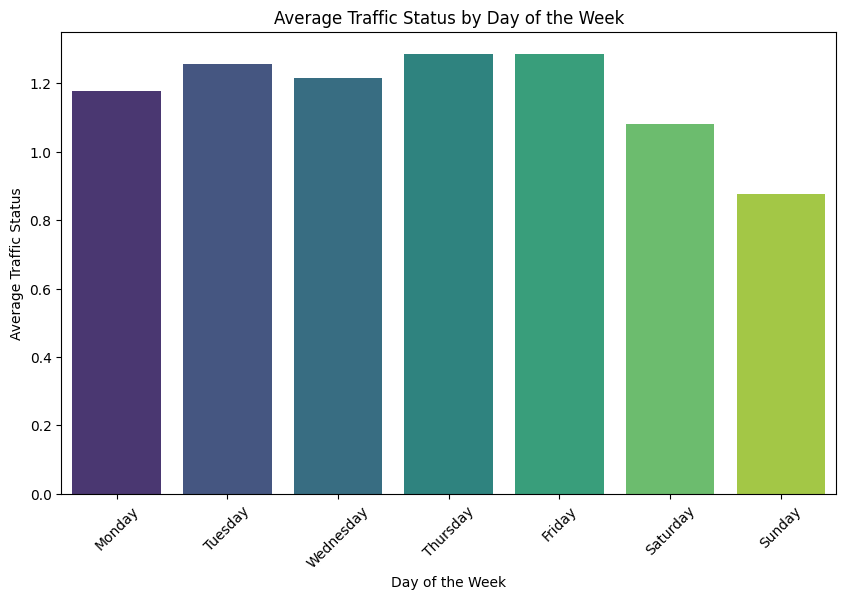

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=traffic_by_day.index, y=traffic_by_day.values, palette='viridis')
plt.title('Average Traffic Status by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Status')
plt.xticks(rotation=45)
plt.show()

In [38]:
days_by_day = df.groupby('day_of_week')['places'].mean() \
            .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [112]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

geolocator = Nominatim(user_agent="my_geocoder")

def get_location_info(row):
    latitude, longitude = row['mid_latitude'], row['mid_longitude']
    # print(latitude, longitude)
    # sleep(2)
    try:
        location = geolocator.reverse((latitude, longitude), exactly_one=True)
        address = location.raw.get('address', {})
        place_rank = location.raw.get('place_rank', 'UNKNOWN')
        importance = location.raw.get('importance', 'UNKNOWN')
        name = location.raw.get('name', 'UNKNOWN')
        district = address.get('suburb', 'UNKNOWN')
        neighbourhood = address.get('neighbourhood', 'UNKNOWN')
        #neighbourhood = address.get('suburb', address.get('neighbourhood', 'UNKNOWN'))
        quarter = address.get('quarter', 'UNKNOWN')
        df = pd.Series([name, neighbourhood, quarter, district, place_rank, importance])
        # print(df)
        return pd.Series([name, neighbourhood, quarter, district, place_rank, importance])
    except Exception as e:
        print(f"Error geocoding {latitude}, {longitude}: {e}")
        return pd.Series(['UNKNOWN'] * 7)

In [113]:
df[['name', 'neighbourhood', 'quarter', 'district', 'place_rank', 'importance']] = df.apply(get_location_info, axis=1)

In [114]:
df.head(5)

,datetime,datetime_epoch,temp_max,temp_min,temp,feels_like_max,feels_like_min,feels_like,dew_point,humidity,precipitation,precip_probability,precip_coverage,precipitation_type,snow,snow_depth,wind_gust,wind_speed,wind_direction,pressure,cloud_cover,visibility,solar_radiation,solar_energy,uv_index,sunrise,sunrise_epoch,sunset,sunset_epoch,moon_phase,conditions,description,icon,stations,source,latitude,longitude,resolved_address,address,timezone,timezone_offset,severe_risk,date,id_tram,utm_ix,utm_fx,utm_iy,utm_fy,latitude_start,longitude_start,latitude_end,longitude_end,tariff_id,schedule_id,section_type,address,places,p_color,rgb,color,type,schedule_code,schedule_description,short_schedule_description,include_holidays,parking_within_schedule,tariff_type_id,tariff_code,fraction_type,max_time,min_time,tariff_description,short_tariff_description,fraction_amount,max_amount,mid_latitude,mid_longitude,description,longitude,latitude,current_status,predicted_status,section_components,day_of_week,name,neighbourhood,quarter,district,place_rank,importance
0,2024-01-09,1704754800,11.3,-0.1,4.8,11.3,-4.3,2.7,-0.4,69.8,0.0,0.0,0.0,NaN,0.0,0.0,24.5,14.0,335.3,1020.0,34.7,14.2,41.3,3.7,2.0,08:17:37,1704784657,17:39:40,1704818380,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.415067,2.107482,"41.4150674,2.1074824","41.4150674,2.1074824",Europe/Madrid,1.0,NaN,2024-01-09,17091,425575.935,425577.388,4584534.165,4584547.852,41.408905,2.109546,41.409029,2.109562,56,13,VM,"CARROÇ, 1, C",4.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.408967,2.109554,Ronda de Dalt (Nus de la Trinitat a Via Júlia),2.117802,41.404822,2.0,2.0,5.0,Tuesday,Camí de la Girgola,UNKNOWN,Sarrià,Sarrià - Sant Gervasi,26,0.100010
1,2024-01-09,1704754800,11.4,0.6,5.1,11.4,-3.9,2.8,-0.3,68.6,0.0,0.0,0.0,NaN,0.0,0.0,22.0,16.3,342.4,1020.0,34.9,15.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:39,1704818379,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.399373,2.121513,"41.399373,2.1215125","41.399373,2.1215125",Europe/Madrid,1.0,NaN,2024-01-09,12599,426537.860,426550.820,4583559.590,4583544.650,41.400216,2.121172,41.400083,2.121328,58,80,DUM,"3716.- MAJOR DE SARRIA, 103-105, C",2.0,7,FFA420,orange,goods parking,Z43,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,1.0,7.0,CYD,0.0,30.0,0.0,AREADUM temps.max.Est.30min,0 E/h <= 30min,0.00,0.0,41.400150,2.121250,Pg. Reina Elisenda (Av. Pedralbes a Via Augusta),2.121481,41.399948,1.0,1.0,12.0,Tuesday,L'ast de sarria,UNKNOWN,Sarrià,Sarrià - Sant Gervasi,30,0.000010
2,2024-01-09,1704754800,11.5,1.0,5.4,11.5,-3.6,3.1,-0.2,67.9,0.0,0.0,0.0,NaN,0.0,0.0,22.0,17.9,345.9,1020.1,34.9,16.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:43,1704818383,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.390140,2.112218,"41.3901401,2.112218","41.3901401,2.112218",Europe/Madrid,1.0,NaN,2024-01-09,18012,425775.796,425782.167,4582428.201,4582434.216,41.389957,2.112195,41.390012,2.112271,56,13,VM,"SOR EULALIA D'ANZIZU, 35, C",15.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.389984,2.112233,Av. Esplugues (Ronda de Dalt a Av. Pedralbes),2.111233,41.391342,1.0,1.0,6.0,Tuesday,,UNKNOWN,Pedralbes,les Corts,30,0.000010
3,2024-01-09,1704754800,11.5,1.2,5.5,11.5,-3.4,3.1,-0.2,67.5,0.0,0.0,0.0,NaN,0.0,0.0,22.0,18.9,347.9,1020.1,34.9,17.2,41.3,3.7,2.0,08:17:27,1704784647,17:39:41,1704818381,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.381986,2.125608,"41.3819857,2.1256083","41.3819857,2.1256083"

In [115]:
#df.to_csv('important_checkpoint5_data.csv')

## Unsupervised Learning

***Steps to agglomerative hierarchical clustering***

****Preparing the data****
*****Computing (dis)similarity information between every pair of objects in the data set.*****
*****Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at step 1. Objects/clusters that are in close proximity are linked together using the linkage function.*****
*****Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.*****

In [9]:
df = pd.read_csv('important_checkpoint5_data.csv', index_col=0)

In [75]:
#df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.day
df['day'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [60]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in ('Saturday', 'Sunday') else 0)

In [39]:
df['neighbourhood'] = df['neighbourhood'].replace('UNKNOWN', np.nan)

In [42]:
df['neighbourhood_bcn'] = df['neighbourhood'].combine_first(df['quarter'])

In [76]:
df.head(5)

,datetime,datetime_epoch,temp_max,temp_min,temp,feels_like_max,feels_like_min,feels_like,dew_point,humidity,precipitation,precip_probability,precip_coverage,precipitation_type,snow,snow_depth,wind_gust,wind_speed,wind_direction,pressure,cloud_cover,visibility,solar_radiation,solar_energy,uv_index,sunrise,sunrise_epoch,sunset,sunset_epoch,moon_phase,conditions,description,icon,stations,source,latitude,longitude,resolved_address,address,timezone,timezone_offset,severe_risk,date,id_tram,utm_ix,utm_fx,utm_iy,utm_fy,latitude_start,longitude_start,latitude_end,longitude_end,tariff_id,schedule_id,section_type,address.1,places,p_color,rgb,color,type,schedule_code,schedule_description,short_schedule_description,include_holidays,parking_within_schedule,tariff_type_id,tariff_code,fraction_type,max_time,min_time,tariff_description,short_tariff_description,fraction_amount,max_amount,mid_latitude,mid_longitude,description.1,longitude.1,latitude.1,current_status,predicted_status,section_components,day_of_week,name,neighbourhood,quarter,district,place_rank,importance,month,day,neighbourhood_bcn,is_weekend,year
0,2024-01-09,1704754800,11.3,-0.1,4.8,11.3,-4.3,2.7,-0.4,69.8,0.0,0.0,0.0,NaN,0.0,0.0,24.5,14.0,335.3,1020.0,34.7,14.2,41.3,3.7,2.0,08:17:37,1704784657,17:39:40,1704818380,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.415067,2.107482,"41.4150674,2.1074824","41.4150674,2.1074824",Europe/Madrid,1.0,NaN,2024-01-09,17091,425575.935,425577.388,4584534.165,4584547.852,41.408905,2.109546,41.409029,2.109562,56,13,VM,"CARROÇ, 1, C",4.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.408967,2.109554,Ronda de Dalt (Nus de la Trinitat a Via Júlia),2.117802,41.404822,2.0,2.0,5.0,Tuesday,Camí de la Girgola,NaN,Sarrià,Sarrià - Sant Gervasi,26,0.100010,9,1,Sarrià,0,2024
1,2024-01-09,1704754800,11.4,0.6,5.1,11.4,-3.9,2.8,-0.3,68.6,0.0,0.0,0.0,NaN,0.0,0.0,22.0,16.3,342.4,1020.0,34.9,15.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:39,1704818379,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.399373,2.121513,"41.399373,2.1215125","41.399373,2.1215125",Europe/Madrid,1.0,NaN,2024-01-09,12599,426537.860,426550.820,4583559.590,4583544.650,41.400216,2.121172,41.400083,2.121328,58,80,DUM,"3716.- MAJOR DE SARRIA, 103-105, C",2.0,7,FFA420,orange,goods parking,Z43,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,1.0,7.0,CYD,0.0,30.0,0.0,AREADUM temps.max.Est.30min,0 E/h <= 30min,0.00,0.0,41.400150,2.121250,Pg. Reina Elisenda (Av. Pedralbes a Via Augusta),2.121481,41.399948,1.0,1.0,12.0,Tuesday,L'ast de sarria,NaN,Sarrià,Sarrià - Sant Gervasi,30,0.000010,9,1,Sarrià,0,2024
2,2024-01-09,1704754800,11.5,1.0,5.4,11.5,-3.6,3.1,-0.2,67.9,0.0,0.0,0.0,NaN,0.0,0.0,22.0,17.9,345.9,1020.1,34.9,16.6,41.3,3.7,2.0,08:17:31,1704784651,17:39:43,1704818383,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'AR110', '08184099999', 'LELL...",obs,41.390140,2.112218,"41.3901401,2.112218","41.3901401,2.112218",Europe/Madrid,1.0,NaN,2024-01-09,18012,425775.796,425782.167,4582428.201,4582434.216,41.389957,2.112195,41.390012,2.112271,56,13,VM,"SOR EULALIA D'ANZIZU, 35, C",15.0,3,00FF00,green,free parking,H5,de Dl a Dv de 08:00 a 20:00,de Dl a Dv 8-20,0.0,0.0,3.0,MB2,1.0,2.0,0.0,"2,75 euros/hora Temp.max Est. 2 hores","2,75 E/h <= 2h",2.75,5.5,41.389984,2.112233,Av. Esplugues (Ronda de Dalt a Av. Pedralbes),2.111233,41.391342,1.0,1.0,6.0,Tuesday,NaN,NaN,Pedralbes,les Corts,30,0.000010,9,1,Pedralbes,0,2024
3,2024-01-09,1704754800,11.5,1.2,5.5,11.5,-3.4,3.1,-0.2,67.5,0.0,0.0,0.0,NaN,0.0,0.0,22.0,18.9,347.9,1020.1,34.9,17.2,41.3,3.7,2.0,08:17:27,1704784647,17:39:41,1704818381,0.93,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"['LEBL', 'LEGE', 'A

In [301]:
#df.drop(columns=['quarter', 'neighbourhood']).to_csv('checkpoint5_neighbourhood_district_data.csv')

In [25]:
traffic_by_district = df.groupby('district')['current_status'].mean()

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_2873/2694466465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_by_district.index, y=traffic_by_district.values, palette='viridis')


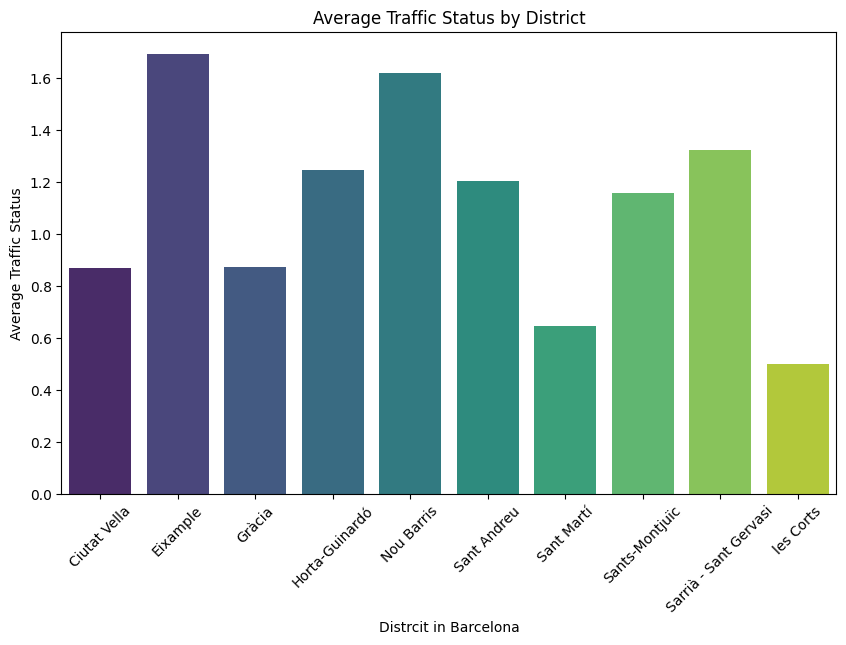

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=traffic_by_district.index, y=traffic_by_district.values, palette='viridis')
plt.title('Average Traffic Status by District')
plt.xlabel('Distrcit in Barcelona')
plt.ylabel('Average Traffic Status')
plt.xticks(rotation=45)
plt.show()

In [49]:
traffic_by_neighbourhood = df.groupby('neighbourhood', as_index=False)['current_status'].mean() \
                                .sort_values(by='current_status', ascending=False) \
                                .reset_index(drop=True)

In [50]:
traffic_by_neighbourhood.head(5)

,neighbourhood,current_status
0,les Roquetes,2.000000
1,la Trinitat Nova,1.987578
2,la Marina del Prat Vermell,1.971014
3,la Marina de Port,1.971014
4,la Vall d'Hebron,1.942029


/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_2873/4059987644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_by_neighbourhood['neighbourhood'][:10], y=traffic_by_neighbourhood['current_status'][:10], palette='viridis')


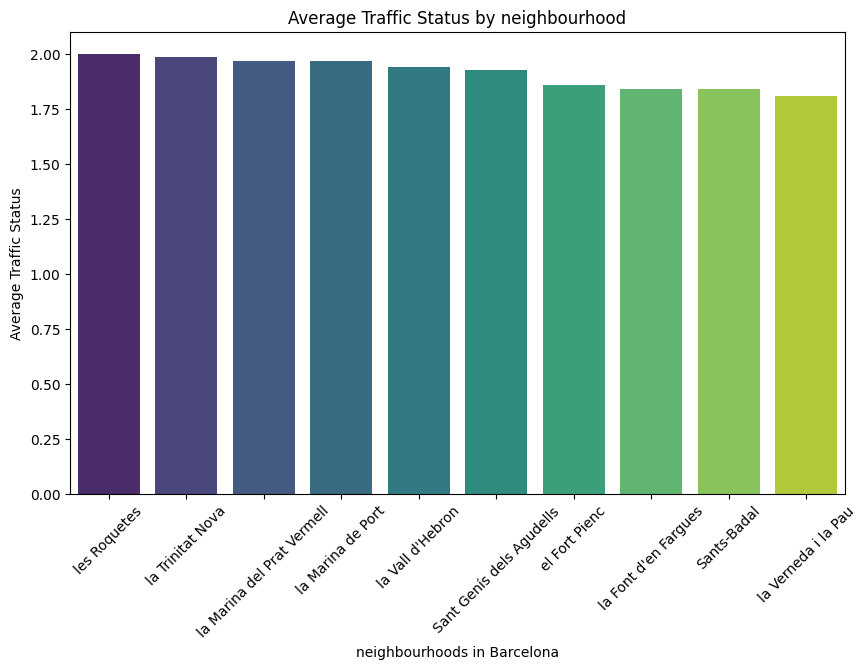

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=traffic_by_neighbourhood['neighbourhood'][:10], y=traffic_by_neighbourhood['current_status'][:10], palette='viridis')
plt.title('Average Traffic Status by neighbourhood')
plt.xlabel('neighbourhoods in Barcelona')
plt.ylabel('Average Traffic Status')
plt.xticks(rotation=45)
plt.show()

### Data Loading

In [55]:
list(df)

['datetime',
 'datetime_epoch',
 'temp_max',
 'temp_min',
 'temp',
 'feels_like_max',
 'feels_like_min',
 'feels_like',
 'dew_point',
 'humidity',
 'precipitation',
 'precip_probability',
 'precip_coverage',
 'precipitation_type',
 'snow',
 'snow_depth',
 'wind_gust',
 'wind_speed',
 'wind_direction',
 'pressure',
 'cloud_cover',
 'visibility',
 'solar_radiation',
 'solar_energy',
 'uv_index',
 'sunrise',
 'sunrise_epoch',
 'sunset',
 'sunset_epoch',
 'moon_phase',
 'conditions',
 'description',
 'icon',
 'stations',
 'source',
 'latitude',
 'longitude',
 'resolved_address',
 'address',
 'timezone',
 'timezone_offset',
 'severe_risk',
 'date',
 'id_tram',
 'utm_ix',
 'utm_fx',
 'utm_iy',
 'utm_fy',
 'latitude_start',
 'longitude_start',
 'latitude_end',
 'longitude_end',
 'tariff_id',
 'schedule_id',
 'section_type',
 'address.1',
 'places',
 'p_color',
 'rgb',
 'color',
 'type',
 'schedule_code',
 'schedule_description',
 'short_schedule_description',
 'include_holidays',
 'parking_wi

##### Useful Fields for Predicting Parking Availability

Temporal Fields

	•	datetime
	•	day_of_week
	•	date

Weather Data

	•	temp_max, temp_min, temp
	•	feels_like_max, feels_like_min, feels_like
	•	dew_point
	•	humidity
	•	precipitation, precip_probability, precip_coverage, precipitation_type
	•	snow, snow_depth
	•	wind_gust, wind_speed, wind_direction
	•	pressure
	•	cloud_cover
	•	visibility
	•	solar_radiation, solar_energy
	•	uv_index
	•	conditions
	•	description

Location Data

	•	latitude, longitude
	•	latitude_start, longitude_start, latitude_end, longitude_end
	•	resolved_address, address
	•	mid_latitude, mid_longitude
	•	neighbourhood, quarter, district

Parking Data

	•	id_tram
	•	places
	•	current_status
	•	predicted_status
	•	tariff_id, tariff_code, tariff_description, short_tariff_description, max_time, min_time
	•	schedule_id, schedule_code, schedule_description, short_schedule_description
	•	section_type, section_components

Traffic Data

	•	current_status

2. Fields for Clustering High Traffic + Worst Weather

For clustering to assign high traffic and adverse weather conditions, we can use the following fields:

Traffic Indicators

	•	current_status

Weather Indicators

	•	precipitation, precip_probability, precip_coverage
	•	snow, snow_depth
	•	wind_gust, wind_speed
	•	visibility
	•	conditions (categorical field can be encoded for clustering)

Temporal Indicators

	•	datetime (for time-based clustering)
	•	day_of_week

Steps to Create Clusters and Predict Parking Availability

	1.	Data Preprocessing:
	•	Clean and handle missing values in the dataset.
	•	Normalize or standardize numerical fields (e.g., weather data, traffic index).
	•	Encode categorical fields (e.g., conditions, neighbourhood, quarter, district).
	2.	Feature Selection for Clustering:
	•	Select features: traffic_index, precipitation, precip_probability, snow, wind_gust, visibility, conditions, day_of_week.
	•	Perform feature engineering if necessary (e.g., creating interaction terms).
	3.	Clustering:
	•	Use clustering algorithms like K-means, DBSCAN, or hierarchical clustering to create clusters.
	•	Evaluate clusters using metrics like silhouette score to ensure meaningful grouping.
	4.	Modeling Parking Availability:
	•	Combine cluster labels with other features (places, tariff_id, current_status).
	•	Train predictive models (e.g., Logistic Regression, Random Forest, Gradient Boosting) using selected features and target variable (current_status or predicted_status).
	5.	Evaluation and Deployment:
	•	Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).
	•	Deploy the model and monitor its performance, retraining as necessary.

In [201]:
df_clustering = df[['places', 'neighbourhood_bcn', 'district','current_status', 'precipitation', 'precip_probability', 'precip_coverage', 'temp', 'snow', 'snow_depth', 'wind_gust', 'visibility','cloud_cover' ,'conditions', 'day_of_week', 'month', 'day', 'is_weekend', 'year']]

In [202]:
df_clustering.head(5)

,places,neighbourhood_bcn,district,current_status,precipitation,precip_probability,precip_coverage,temp,snow,snow_depth,wind_gust,visibility,cloud_cover,conditions,day_of_week,month,day,is_weekend,year
0,4.0,Sarrià,Sarrià - Sant Gervasi,2.0,0.0,0.0,0.0,4.8,0.0,0.0,24.5,14.2,34.7,Partially cloudy,Tuesday,9,1,0,2024
1,2.0,Sarrià,Sarrià - Sant Gervasi,1.0,0.0,0.0,0.0,5.1,0.0,0.0,22.0,15.6,34.9,Partially cloudy,Tuesday,9,1,0,2024
2,15.0,Pedralbes,les Corts,1.0,0.0,0.0,0.0,5.4,0.0,0.0,22.0,16.6,34.9,Partially cloudy,Tuesday,9,1,0,2024
3,12.0,la Maternitat i Sant Ramon,les Corts,0.0,0.0,0.0,0.0,5.5,0.0,0.0,22.0,17.2,34.9,Partially cloudy,Tuesday,9,1,0,2024
4,4.0,Sant Gervasi,Sarrià - Sant Gervasi,1.0,0.0,0.0,0.0,4.9,0.0,0.0,22.0,14.9,34.9,Partially cloudy,Tuesday,9,1,0,2024


In [203]:
list(df_clustering)

['places',
 'neighbourhood_bcn',
 'district',
 'current_status',
 'precipitation',
 'precip_probability',
 'precip_coverage',
 'temp',
 'snow',
 'snow_depth',
 'wind_gust',
 'visibility',
 'cloud_cover',
 'conditions',
 'day_of_week',
 'month',
 'day',
 'is_weekend',
 'year']

#### Null Values

In [204]:
mean_per_neighbourhood = df_clustering.groupby('neighbourhood_bcn')['current_status'].transform('mean')
mean_per_neighbourhood.head(5)

0    1.686594
1    1.686594
2    0.420290
3    0.000000
4    1.355072
Name: current_status, dtype: float64

In [205]:
df_clustering['current_status'] = df_clustering['current_status'].fillna(mean_per_neighbourhood)

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_2873/2624995560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['current_status'] = df_clustering['current_status'].fillna(mean_per_neighbourhood)


In [206]:
df_clustering.head(5)

,places,neighbourhood_bcn,district,current_status,precipitation,precip_probability,precip_coverage,temp,snow,snow_depth,wind_gust,visibility,cloud_cover,conditions,day_of_week,month,day,is_weekend,year
0,4.0,Sarrià,Sarrià - Sant Gervasi,2.0,0.0,0.0,0.0,4.8,0.0,0.0,24.5,14.2,34.7,Partially cloudy,Tuesday,9,1,0,2024
1,2.0,Sarrià,Sarrià - Sant Gervasi,1.0,0.0,0.0,0.0,5.1,0.0,0.0,22.0,15.6,34.9,Partially cloudy,Tuesday,9,1,0,2024
2,15.0,Pedralbes,les Corts,1.0,0.0,0.0,0.0,5.4,0.0,0.0,22.0,16.6,34.9,Partially cloudy,Tuesday,9,1,0,2024
3,12.0,la Maternitat i Sant Ramon,les Corts,0.0,0.0,0.0,0.0,5.5,0.0,0.0,22.0,17.2,34.9,Partially cloudy,Tuesday,9,1,0,2024
4,4.0,Sant Gervasi,Sarrià - Sant Gervasi,1.0,0.0,0.0,0.0,4.9,0.0,0.0,22.0,14.9,34.9,Partially cloudy,Tuesday,9,1,0,2024


#### One Hot Encoding

In [207]:
df_encoded = pd.get_dummies(df_clustering, columns = ['neighbourhood_bcn', 'district','conditions', 'day_of_week'])

In [208]:
df_encoded.head(5)

,places,current_status,precipitation,precip_probability,precip_coverage,temp,snow,snow_depth,wind_gust,visibility,cloud_cover,month,day,is_weekend,year,neighbourhood_bcn_Can Baró,neighbourhood_bcn_Can Peguera,neighbourhood_bcn_Diagonal Mar i el Front Marítim del Poblenou,neighbourhood_bcn_Galvany,neighbourhood_bcn_Hostafrancs,neighbourhood_bcn_Montbau,neighbourhood_bcn_Pedralbes,neighbourhood_bcn_Provençals del Poblenou,neighbourhood_bcn_Sant Andreu de Palomar,neighbourhood_bcn_Sant Antoni,neighbourhood_bcn_Sant Genís dels Agudells,neighbourhood_bcn_Sant Gervasi,neighbourhood_bcn_Sant Martí de Provençals,neighbourhood_bcn_Sants,neighbourhood_bcn_Sants-Badal,neighbourhood_bcn_Sarrià,neighbourhood_bcn_UNKNOWN,neighbourhood_bcn_el Baix Guinardó,neighbourhood_bcn_el Besòs i el Maresme,neighbourhood_bcn_el Bon Pastor,neighbourhood_bcn_el Camp d'en Grassot i Gràcia Nova,neighbourhood_bcn_el Camp de l'Arpa del Clot,neighbourhood_bcn_el Carmel,neighbourhood_bcn_el Clot,neighbourhood_bcn_el Coll,neighbourhood_bcn_el Fort Pienc,neighbourhood_bcn_el Guinardó,neighbourhood_bcn_el Gòtic,neighbourhood_bcn_el Parc i la Llacuna del Poblenou,neighbourhood_bcn_el Poblenou,neighbourhood_bcn_el Putxet,neighbourhood_bcn_el Raval,neighbourhood_bcn_el Turó de la Peira,neighbourhood_bcn_els Indians,neighbourhood_bcn_els Penitents,neighbourhood_bcn_l'Antiga Esquerra de l'Eixample,neighbourhood_bcn_la Barceloneta,neighbourhood_bcn_la Bordeta,neighbourhood_bcn_la Clota,neighbourhood_bcn_la Dreta de l'Eixample,neighbourhood_bcn_la Font d'en Fargues,neighbourhood_bcn_la Font de la Guatlla,neighbourhood_bcn_la Guineueta,neighbourhood_bcn_la Marina de Port,neighbourhood_bcn_la Marina del Prat Vermell,neighbourhood_bcn_la Maternitat i Sant Ramon,neighbourhood_bcn_la Nova Esquerra de l'Eixample,neighbourhood_bcn_la Prosperitat,neighbourhood_bcn_la Ribera,neighbourhood_bcn_la Sagrada Família,neighbourhood_bcn_la Sagrera,neighbourhood_bcn_la Teixonera,neighbourhood_bcn_la Torre Llobeta,neighbourhood_bcn_la Trinitat Nova,neighbourhood_bcn_la Vall d'Hebron,neighbourhood_bcn_la Verneda i la Pau,neighbourhood_bcn_la Vila Olímpica del Poblenou,neighbourhood_bcn_la Vila de Gràcia,neighbourhood_bcn_les Roquetes,neighbourhood_bcn_les Tres Torres,district_Ciutat Vella,district_Eixample,district_Gràcia,district_Horta-Guinardó,district_Nou Barris,district_Sant Andreu,district_Sant Martí,district_Sants-Montjuïc,district_Sarrià - Sant Gervasi,district_les Corts,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,conditions_Rain,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy","conditions_Snow, Overcast","conditions_Snow, Partially cloudy","conditions_Snow, Rain","conditions_Snow, Rain, Overcast","conditions_Snow, Rain, Partially cloudy",day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,4.0,2.0,0.0,0.0,0.0,4.8,0.0,0.0,24.5,14.2,34.7,9,1,0,2024,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2.0,1.0,0.0,0.0,0.0,5.1,0.0,0.0,22.0,15.6,34.9,9,1,0,2024,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,F

In [209]:
df_encoded.isnull().sum()

places                   0
current_status           0
precipitation            0
precip_probability       0
precip_coverage          0
                        ..
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
Length: 103, dtype: int64

In [ ]:
def estimate_occupancy(row):
    # Use traffic, weather, and event data proxies to estimate occupancy
    # This is a simplified example, adjust based on your data
    traffic_factor = row['current_status'] / 100
    weather_factor = 1 if row['conditions'] in ['Rain', 'Snow'] else 0.5
    event_factor = 1 if row['event'] else 0.5
    
    estimated_occupancy = traffic_factor * weather_factor * event_factor * row['places']
    return estimated_occupancy

### Scaling

In [112]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df_encoded) 

In [216]:
df_scaled

array([[-0.64241661,  0.90398675, -0.31939324, ..., -0.40488817,
         2.46981781, -0.40488817],
       [-0.98224569, -0.19097087, -0.31939324, ..., -0.40488817,
         2.46981781, -0.40488817],
       [ 1.22664331, -0.19097087, -0.31939324, ..., -0.40488817,
         2.46981781, -0.40488817],
       ...,
       [ 0.54698516, -1.28592849, -0.31939324, ..., -0.40488817,
        -0.40488817, -0.40488817],
       [ 0.03724154,  0.90398675, -0.31939324, ..., -0.40488817,
        -0.40488817, -0.40488817],
       [-0.30258753,  0.90398675, -0.31939324, ..., -0.40488817,
        -0.40488817, -0.40488817]])

#### PCA

In [185]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(df_scaled) 
df_principal = pd.DataFrame(X_principal) 

In [186]:
pca.explained_variance_ratio_

array([0.04264025, 0.02917146])

In [187]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4) * 100)

array([4.26, 7.18])

In [188]:
df_principal

,0,1
0,-1.541610,0.606998
1,-1.555588,0.191758
2,-1.874238,-0.538047
3,-1.887401,-1.068924
4,-1.795891,0.129242
...,...,...
5178,-1.375962,-0.131984
5179,-1.256036,-0.608184
5180,-1.162183,-1.252172
5181,-1.179626,-0.529232


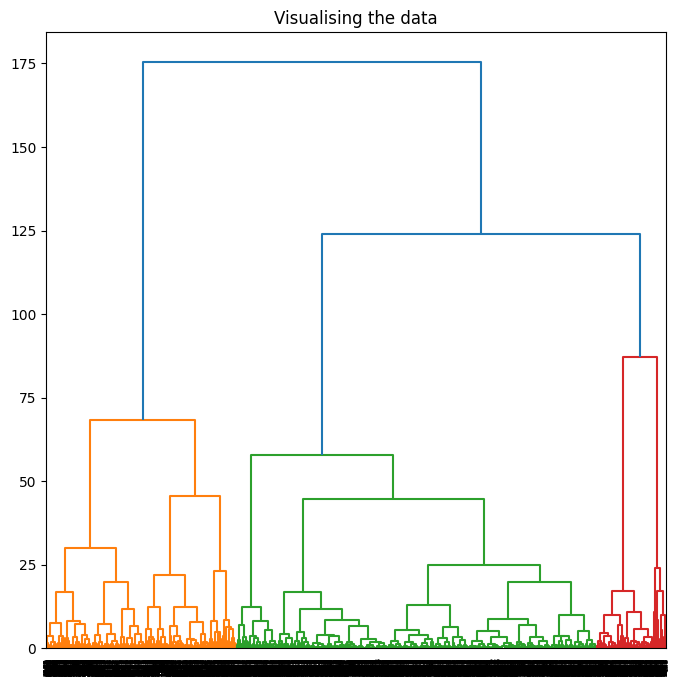

In [189]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

****Euclidean Distance: It measures the straight line distance between 2 points in space.****

****Manhattan Distance: It measures the sum of absolute differences between 2 points/vectors in all dimensions.****

****Cosine Similarity: It measures the angular cosine similarity between 2 vectors.****


In [194]:
def agg_clustering(data, metric):
    cluster_model = AgglomerativeClustering(n_clusters=5,
                                            metric=metric,
                                            linkage='average')
 
    clusters = cluster_model.fit_predict(data)
 
    score = silhouette_score(data,
                             cluster_model.labels_,
                             metric='euclidean')
    return clusters, score

In [195]:
y_euclidean, euclidean_score = agg_clustering(X_principal, 'euclidean')
y_l1, l1_score = agg_clustering(X_principal, 'l1')
y_l2, l2_score = agg_clustering(X_principal, 'l2')
y_manhattan, manhattan_score = agg_clustering(X_principal, 'manhattan')
y_cosine, cosine_score = agg_clustering(X_principal, 'cosine')

In [196]:
np.unique(y_cosine, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 641, 2247,  524,  688, 1083]))

In [197]:
def plot_clusters(data, y, metric):
    plt.scatter(data[y==0, 0], data[y==0, 1],
                s=100, c='red',
                label ='Cluster 1')
    plt.scatter(data[y==1, 0], data[y==1, 1],
                s=100, c='blue',
                label ='Cluster 2')
    plt.scatter(data[y==2, 0], data[y==2, 1],
                s=100, c='green',
                label ='Cluster 3')
    plt.scatter(data[y==3, 0], data[y==3, 1],
                s=100, c='purple',
                label ='Cluster 4')
    plt.scatter(data[y==4, 0], data[y==4, 1],
                s=100, c='orange',
                label ='Cluster 5')
    plt.scatter(data[y==5, 0], data[y==5, 1],
                s=100, c='violet',
                label ='Cluster 6')
    plt.scatter(data[y==6, 0], data[y==6, 1],
                s=100, c='black',
                label ='Cluster 7')
    plt.scatter(data[y==7, 0], data[y==7, 1],
                s=100, c='grey',
                label ='Cluster 8')
    plt.scatter(data[y==8, 0], data[y==8, 1],
                s=100, c='pink',
                label ='Cluster 9')
    plt.scatter(data[y==9, 0], data[y==9, 1],
                s=100, c='brown',
                label ='Cluster 10')
    
    plt.title(f'Clusters of Customers (using {metric} distance metric)')
    plt.xlabel('Features')
    plt.ylabel('Parking Availability[1-10]')
    plt.legend()
    plt.show()

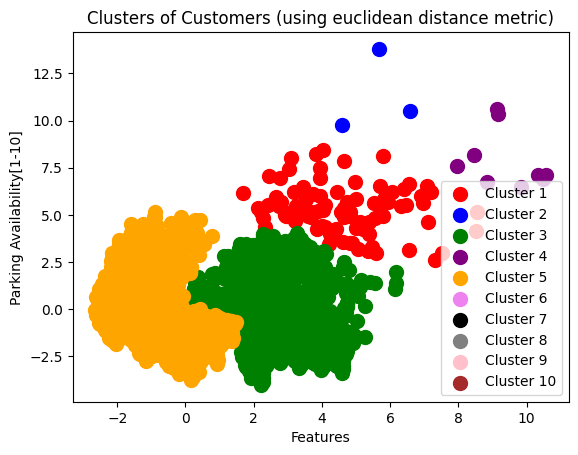

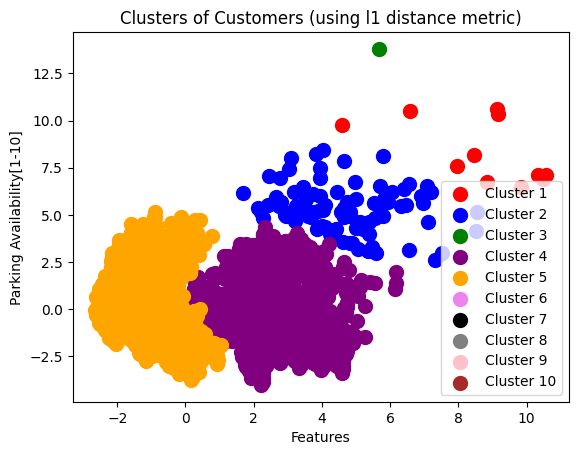

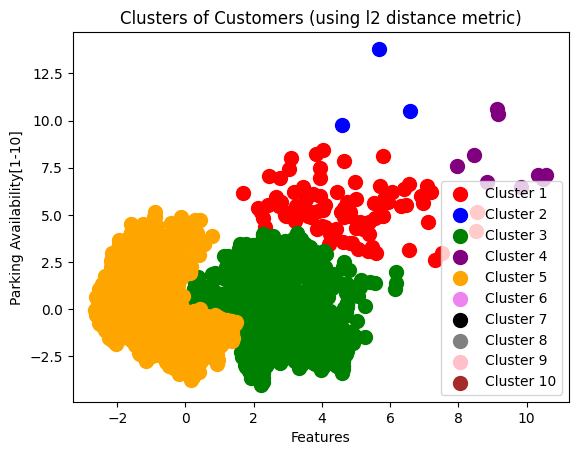

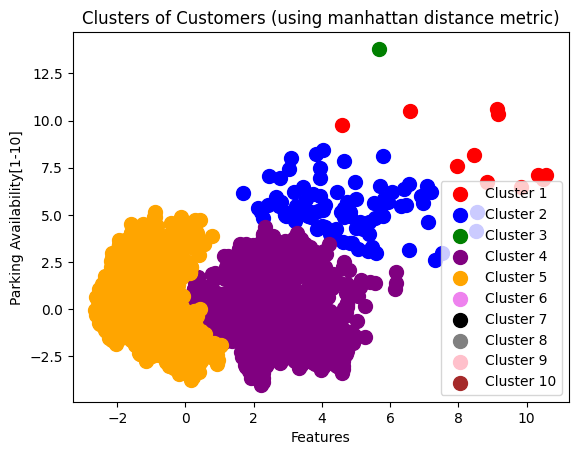

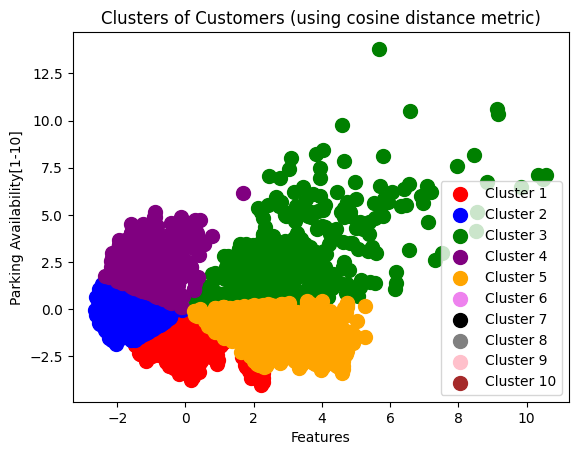

In [198]:
plot_clusters(X_principal, y_euclidean, 'euclidean')
plot_clusters(X_principal, y_l1, 'l1')
plot_clusters(X_principal, y_l2, 'l2')
plot_clusters(X_principal, y_manhattan, 'manhattan')
plot_clusters(X_principal, y_cosine, 'cosine')

In [ ]:
clustering = AgglomerativeClustering().fit(X_principal)
clustering
clustering.labels_

##### Occupancy Ratio

****This rate is defined as the percentage of occupancy at any given time of some parking lot. For example, if the occupancy rate is 80% at a parking lot that has a capacity of 100 parking spaces, this means that 80 cars are parked there at some given moment.****

	1.	Utilization Proxy: Since you don’t have direct information on occupied spaces, you can use a proxy measure that correlates with parking occupancy. For example, you can use the current traffic status as a proxy for parking demand. Higher traffic levels may indicate increased demand for parking spaces.
	2.	Normalize Data: Normalize the proxy measure (e.g., current traffic status) and other relevant factors (e.g., weather conditions, day of the week) to ensure comparability across different variables.
	3.	Weighted Average: Assign weights to each factor based on their importance in influencing parking occupancy. For example, traffic status during peak hours may have a higher weight than weather conditions during off-peak hours.
	4.	Calculate Estimated Occupancy Rate: Combine the normalized proxy measure and other factors using a weighted average approach to estimate the occupancy rate.
	5.	Adjustments: Fine-tune the estimated occupancy rate based on additional insights or assumptions. For example, you may adjust the occupancy rate higher during weekends or holidays, or during adverse weather conditions that may deter people from parking.
	6.	Validation and Iteration: Validate the estimated occupancy rate against any available historical data or ground truth observations. Iterate on the model parameters or assumptions as needed to improve accuracy.


df['normalized_traffic_status'] = (df['current_status'] - df['current_status'].min()) / (df['current_status'].max() - df['current_status'].min())

In [269]:
df_weight_estimation = df_encoded[['places', 'current_status', 'precipitation', 'visibility', 'cloud_cover', 'is_weekend', 'snow', 'temp']]

In [270]:
scaler = MinMaxScaler() 
scaled_estimation = scaler.fit_transform(df_weight_estimation) 

In [271]:
df_scaled_weight_estimation = pd.DataFrame(scaled_estimation, columns = df_weight_estimation.columns)
df_scaled_weight_estimation.head(5)

,places,current_status,precipitation,visibility,cloud_cover,is_weekend,snow,temp
0,0.103448,0.571429,0.0,0.422939,0.345691,0.0,0.0,0.463115
1,0.034483,0.285714,0.0,0.473118,0.347695,0.0,0.0,0.475410
2,0.482759,0.285714,0.0,0.508961,0.347695,0.0,0.0,0.487705
3,0.379310,0.000000,0.0,0.530466,0.347695,0.0,0.0,0.491803
4,0.103448,0.285714,0.0,0.448029,0.347695,0.0,0.0,0.467213


In [272]:
weights = {'places': 0.5,'current_status': 0.3, 'precipitation': 0.15, 'visibility': 0.1, 'cloud_cover': 0.1, 'is_weekend': 0.1, 'snow': 0.1, 'temp': 0.1}

In [275]:
df_scaled_weight_estimation['estimated_occupancy_rate'] = df_scaled_weight_estimation[['places','current_status', 'precipitation', 'visibility', 'cloud_cover', 'is_weekend', 'snow', 'temp']].mul(weights.values()).sum(axis=1)

In [276]:
df_scaled_weight_estimation

,places,current_status,precipitation,visibility,cloud_cover,is_weekend,snow,temp,estimated_occupancy_rate
0,0.103448,0.571429,0.0,0.422939,0.345691,0.0,0.0,0.463115,0.346327
1,0.034483,0.285714,0.0,0.473118,0.347695,0.0,0.0,0.475410,0.232578
2,0.482759,0.285714,0.0,0.508961,0.347695,0.0,0.0,0.487705,0.461530
3,0.379310,0.000000,0.0,0.530466,0.347695,0.0,0.0,0.491803,0.326652
4,0.103448,0.285714,0.0,0.448029,0.347695,0.0,0.0,0.467213,0.263732
...,...,...,...,...,...,...,...,...,...
5178,0.068966,0.571429,0.0,0.365591,0.330661,0.0,0.0,0.754098,0.350946
5179,0.000000,0.571429,0.0,0.415771,0.327655,0.0,0.0,0.762295,0.322001
5180,0.344828,0.000000,0.0,0.433692,0.327655,0.0,0.0,0.766393,0.325188
5181,0.241379,0.571429,0.0,0.455197,0.324649,0.0,0.0,0.770492,0.447152


In [260]:
df_scaled_weight_estimation['estimated_occupancy_rate']

0       0.294603
1       0.215337
2       0.220150
3       0.136996
4       0.212008
          ...   
5178    0.316464
5179    0.322001
5180    0.152774
5181    0.326462
5182    0.326836
Name: estimated_occupancy_rate, Length: 5183, dtype: float64

In [254]:
original_scaled_weight_estimation = scaler.inverse_transform(df_scaled_weight_estimation.iloc[:,:-1])

In [263]:
df_original_scaled_weight_estimation = pd.DataFrame(original_scaled_weight_estimation, columns = df_weight_estimation.columns)
df_original_scaled_weight_estimation.head(5)

,current_status,precipitation,visibility,cloud_cover,is_weekend,snow,temp
0,2.0,0.0,14.2,34.7,0.0,0.0,4.8
1,1.0,0.0,15.6,34.9,0.0,0.0,5.1
2,1.0,0.0,16.6,34.9,0.0,0.0,5.4
3,0.0,0.0,17.2,34.9,0.0,0.0,5.5
4,1.0,0.0,14.9,34.9,0.0,0.0,4.9


In [264]:
df_original_scaled_weight_estimation['estimated_occupancy_rate'] = df_scaled_weight_estimation['estimated_occupancy_rate']

In [265]:
df_original_scaled_weight_estimation

,current_status,precipitation,visibility,cloud_cover,is_weekend,snow,temp,estimated_occupancy_rate
0,2.0,0.0,14.2,34.7,0.0,0.0,4.8,0.294603
1,1.0,0.0,15.6,34.9,0.0,0.0,5.1,0.215337
2,1.0,0.0,16.6,34.9,0.0,0.0,5.4,0.220150
3,0.0,0.0,17.2,34.9,0.0,0.0,5.5,0.136996
4,1.0,0.0,14.9,34.9,0.0,0.0,4.9,0.212008
...,...,...,...,...,...,...,...,...
5178,2.0,0.0,12.6,33.2,0.0,0.0,11.9,0.316464
5179,2.0,0.0,14.0,32.9,0.0,0.0,12.1,0.322001
5180,0.0,0.0,14.5,32.9,0.0,0.0,12.2,0.152774
5181,2.0,0.0,15.1,32.6,0.0,0.0,12.3,0.326462


In [ ]:
### Another approach?

In [277]:
features = ['places', 'current_status', 'precipitation', 'visibility', 'cloud_cover', 'is_weekend', 'snow', 'temp']

In [281]:
cluster = AgglomerativeClustering(n_clusters=3)  # Start with 3 clusters, adjust as needed
df_scaled_weight_estimation['cluster'] = cluster.fit_predict(df_scaled_weight_estimation)

In [290]:
df_clustering['cluster'] = df_scaled_weight_estimation['cluster']

/var/folders/jx/_xm3vpjj6sbc2s0vkvwl7wp80000gp/T/ipykernel_2873/3450314000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = df_scaled_weight_estimation['cluster']


In [291]:
df_clustering.head(5)

,places,neighbourhood_bcn,district,current_status,precipitation,precip_probability,precip_coverage,temp,snow,snow_depth,wind_gust,visibility,cloud_cover,conditions,day_of_week,month,day,is_weekend,year,estimated_occupancy_rate,cluster
0,4.0,Sarrià,Sarrià - Sant Gervasi,2.0,0.0,0.0,0.0,4.8,0.0,0.0,24.5,14.2,34.7,Partially cloudy,Tuesday,9,1,0,2024,-0.117806,0
1,2.0,Sarrià,Sarrià - Sant Gervasi,1.0,0.0,0.0,0.0,5.1,0.0,0.0,22.0,15.6,34.9,Partially cloudy,Tuesday,9,1,0,2024,-0.376014,2
2,15.0,Pedralbes,les Corts,1.0,0.0,0.0,0.0,5.4,0.0,0.0,22.0,16.6,34.9,Partially cloudy,Tuesday,9,1,0,2024,-0.323016,0
3,12.0,la Maternitat i Sant Ramon,les Corts,0.0,0.0,0.0,0.0,5.5,0.0,0.0,22.0,17.2,34.9,Partially cloudy,Tuesday,9,1,0,2024,-0.622935,2
4,4.0,Sant Gervasi,Sarrià - Sant Gervasi,1.0,0.0,0.0,0.0,4.9,0.0,0.0,22.0,14.9,34.9,Partially cloudy,Tuesday,9,1,0,2024,-0.412709,2


In [ ]:
##### Relationship between cluster and Traffic Status

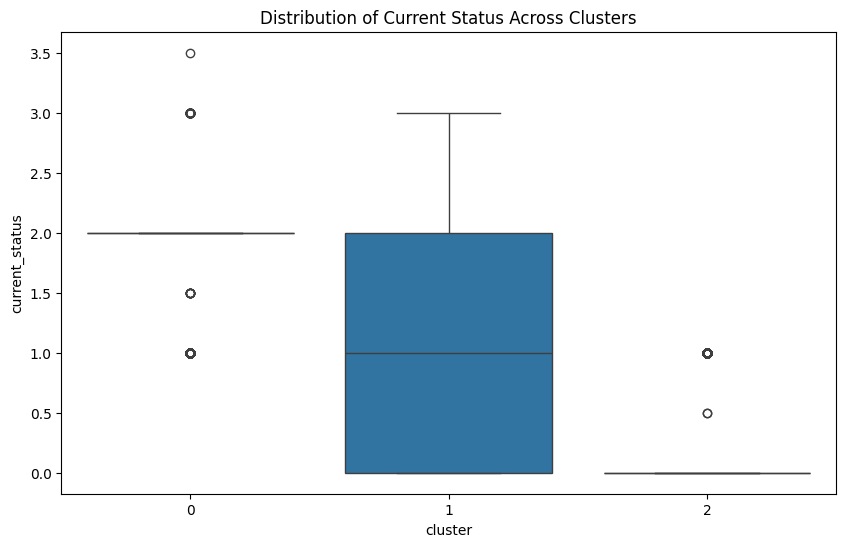

In [292]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='current_status', data=df)
plt.title('Distribution of Current Status Across Clusters')
plt.show()

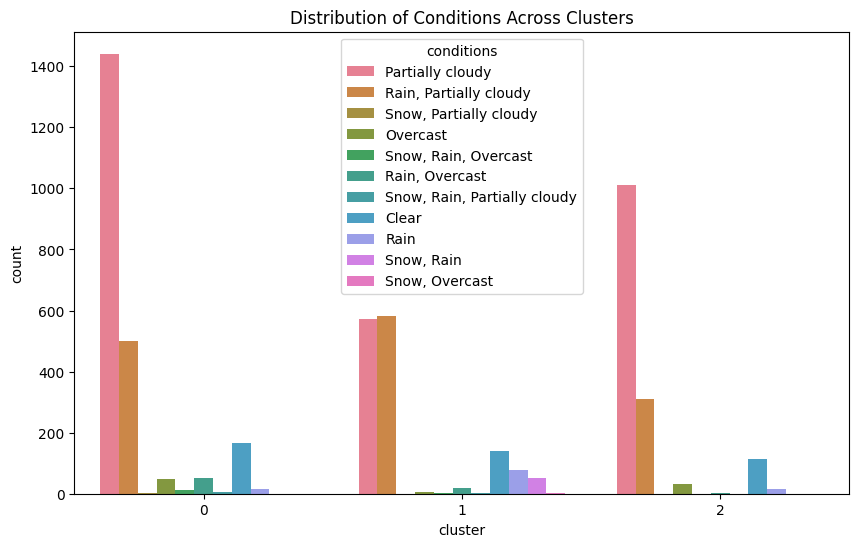

In [293]:
# Plot the distribution of 'conditions' across different clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='conditions', data=df)
plt.title('Distribution of Conditions Across Clusters')
plt.show()

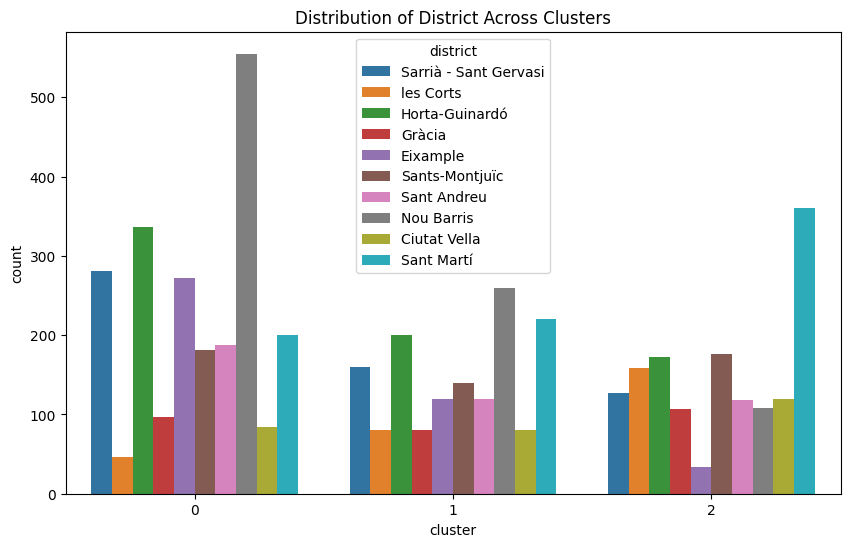

In [294]:
# Plot the distribution of 'district' across different clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='district', data=df)
plt.title('Distribution of District Across Clusters')
plt.show()

#### model sensitivity to seasonal patterns 

In [298]:
df['current_status'].value_counts()

current_status
2.000000    2502
0.000000    1750
1.000000     769
3.000000      41
1.987578      14
1.500000      14
1.686594       8
1.328502       6
1.971014       4
1.840580       4
1.695652       4
1.557971       4
0.420290       4
1.797101       2
1.333333       2
1.862319       2
1.028986       2
1.550725       2
0.724638       2
1.594203       2
1.804348       2
1.543478       2
1.724638       2
1.811594       2
1.826087       2
0.500000       2
0.347826       2
1.760870       2
1.565217       2
1.949275       2
1.782609       2
1.710145       2
1.739130       2
1.623188       2
0.695652       2
1.753623       2
1.478261       2
1.717391       2
1.927536       2
1.942029       2
1.166667       2
1.355072       2
3.500000       1
Name: count, dtype: int64